# Análises preditivas

## Carregando dados

In [1]:
import yfinance

In [5]:
ticker = input("Digite o ticker da ação desejada: ")

Digite o ticker da ação desejada: BTC-USD


In [6]:
acao = yfinance.Ticker(ticker).history("2y")

<AxesSubplot:xlabel='Date'>

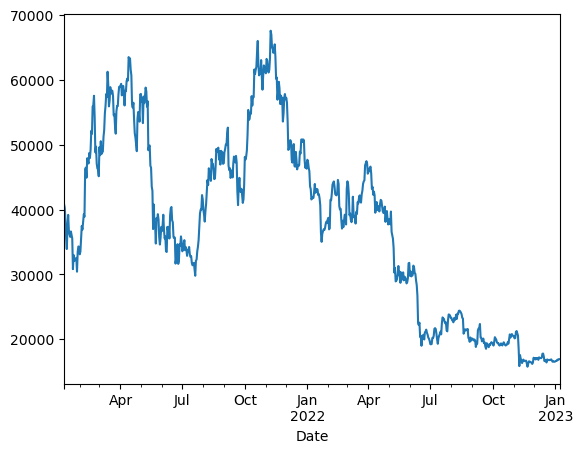

In [7]:
acao.Close.plot()

In [8]:
dados = acao.reset_index()
colunas = ["Date", "Close"]
dados = dados[colunas]
dados["Date"] = dados["Date"].dt.tz_localize(None)
#nome do Date foi alterado para ds e Close para Y
dados.columns = ["ds", "y"]
dados

,ds,y
0,2021-01-08,40797.609375
1,2021-01-09,40254.546875
2,2021-01-10,38356.441406
3,2021-01-11,35566.656250
4,2021-01-12,33922.960938
...,...,...
726,2023-01-04,16863.238281
727,2023-01-05,16836.736328
728,2023-01-06,16951.968750
729,2023-01-07,16955.078125


# Treinando o modelo - Prophet

In [29]:
!pip install prophet

     --------------------------------------- 12.1/12.1 MB 50.4 MB/s eta 0:00:00
     ---------------------------------------- 47.9/47.9 kB 2.4 MB/s eta 0:00:00
     ---------------------------------------- 187.5/187.5 kB ? eta 0:00:00
     ---------------------------------------- 81.2/81.2 kB ? eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 45.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.4/1.4 MB 30.8 MB/s eta 0:00:00
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732001 sha256=9a8305ad32483b85b097f2d734aa460f2079924186db47096bf5507593dc64b3
  Stored in directory: c:\users\neto\appdata\local\pip\cache\wheels\04\1f\e5\8dd0c661cd8d252817655dc14a84f7ae045d6616594145aa81
Successfully built pymeeus


In [31]:
from prophet import Prophet
from prophet.plot import plot_plotly

In [46]:
modelo = Prophet()
modelo.fit(dados)

16:16:35 - cmdstanpy - INFO - Chain [1] start processing
16:16:37 - cmdstanpy - INFO - Chain [1] done processing


In [50]:
periodo = modelo.make_future_dataframe(180)

In [48]:
previsoes = modelo.predict(periodo)

In [51]:
plot_plotly(modelo, previsoes)